# 04. Optimization Techniques | تقنيات التحسين

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Notebook 1: Search Algorithms** - Understanding search strategies and problem-solving
- ✅ **Notebook 3: Learning under Uncertainty** - Understanding decision-making under uncertainty
- ✅ **Basic Calculus**: Understanding derivatives (slope/gradient) - at least conceptually
- ✅ **Basic Math**: Understanding functions (f(x) = y)

**Python Skills Needed**:
- ✅ NumPy arrays (from previous notebooks)
- ✅ Matplotlib for visualization (from Notebook 1)
- ✅ Functions and loops (from Python basics)

**If you haven't completed these**, you might struggle with:
- Understanding gradient descent (needs understanding of derivatives)
- Understanding optimization as search (needs Notebook 1)
- Understanding why we optimize (needs decision-making from Notebook 3)

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This notebook comes AFTER Notebooks 1 & 3**

**Builds on**:
- 📓 **Notebook 1: Search Algorithms** - Search strategies, finding optimal paths
- 📓 **Notebook 3: Learning under Uncertainty** - Decision-making, expected utility

**Leads to**:
- 📓 **Notebook 5: AI Learning Models** - Machine learning needs optimization to train models

**Why this order?**
1. **After Search Algorithms**: Optimization is like "searching" for the best solution (minimum/maximum)
2. **After Uncertainty**: We learned about decision-making. Optimization answers "what's the best decision?"
3. **Before AI Models**: Machine learning models need optimization to "learn" (find best parameters)

---

## The Story: Finding the Best Solution | القصة: إيجاد الحل الأمثل

**THE PROBLEM**: We need to find the minimum/maximum of a function, but we don't know where it is!

**BEFORE**: We might try random values or guess - inefficient and might miss the best solution.
**AFTER**: We use optimization algorithms (gradient descent, genetic algorithms) to systematically find the best solution!

---

## ❌ THE PROBLEM: Why Optimization Matters | المشكلة: لماذا يهم التحسين؟

**Problem 1**: We need to minimize cost, maximize profit, or find optimal parameters
- Machine learning: Find best model parameters
- Engineering: Minimize material cost while maintaining strength
- Business: Maximize profit with limited resources

**Problem 2**: Without optimization algorithms, we:
- Try random values (inefficient, might never find optimum)
- Check every possible value (too slow for large problems)
- Guess based on experience (might miss better solutions)

**WHY IT MATTERS**: Finding the optimal solution can save money, improve performance, or enable new capabilities!

---

## ✅ THE SOLUTION: Optimization Algorithms | الحل: خوارزميات التحسين

**Solution**: Use mathematical optimization algorithms:
1. **Gradient Descent**: Follow the slope downhill to find minimum
2. **Genetic Algorithms**: Evolve solutions like natural selection
3. **Simulated Annealing**: Escape local minima to find global optimum

**HOW IT SOLVES IT**:
- ✅ Instead of random search → Systematic search
- ✅ Instead of checking everything → Smart algorithms that find optimum faster
- ✅ Instead of guessing → Mathematical methods that efficiently find optimum

## Learning Objectives | أهداف التعلم
1. Understand the PROBLEM of optimization
2. Learn the SOLUTION: optimization algorithms
3. See HOW they solve real-world problems
4. Compare BEFORE (random/guess) vs AFTER (systematic optimization)

## Part 1: ❌ BEFORE - The Problem | الجزء الأول: قبل - المشكلة

**THE PROBLEM**: Finding the minimum of a function without optimization.

❌ BEFORE: The Problem - Finding Minimum Without Optimization

Problem: Find x that minimizes f(x) = x²

❌ PROBLEM 1: Random Search (Inefficient)
   • Try random values: x = 5, x = -3, x = 2.7, x = -1.2...
   • Check each one: f(5) = 25, f(-3) = 9, f(2.7) = 7.29...
   • Keep trying until we find something close
   → Very slow! Might take thousands of tries!

❌ PROBLEM 2: Grid Search (Too Slow)
   • Check every value: x = -10, -9.99, -9.98, ..., 9.99, 10
   • Check 20,000 values to get 0.001 precision
   → Too slow for high-dimensional problems!

❌ PROBLEM 3: Guessing (Might Miss Optimum)
   • Guess: 'I think x = 0 looks good'
   • But what if we have a more complex function?
   → Might miss the actual minimum!

🤔 WHY THIS IS A PROBLEM:
   • ML training: Need optimal parameters for accuracy
   • Engineering: Optimal design saves money
   • Business: Optimal decisions maximize profit

💡 THE SOLUTION: Use optimization algorithms!


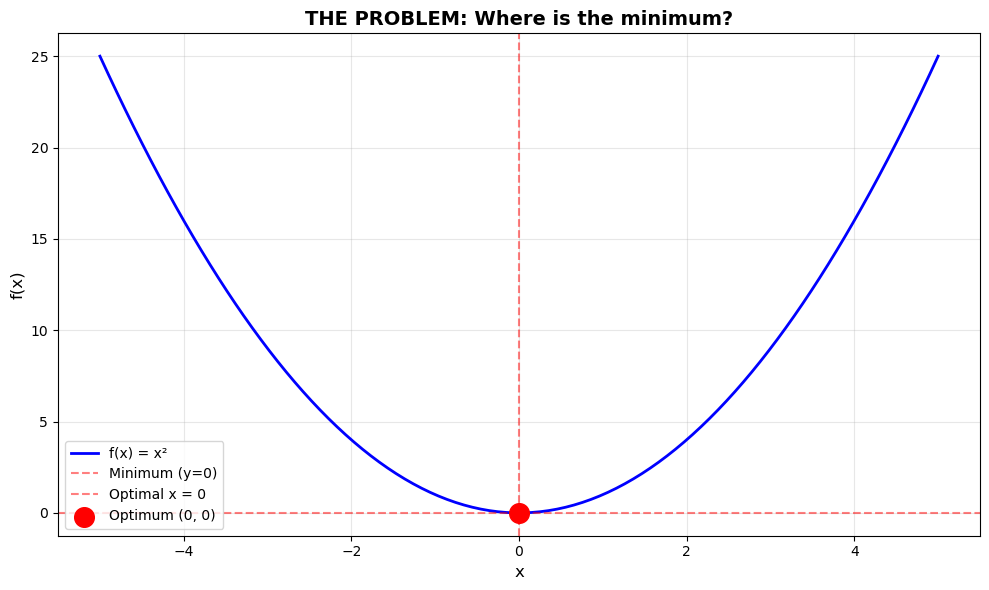

📊 Visual: The problem - where is the minimum? (Without optimization, hard to find!)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ❌ THE PROBLEM: We need to find the minimum of f(x) = x²
# Without optimization, how do we find it?

def f(x):
    """Function we want to minimize: f(x) = x²
    
    Handles both scalar and array inputs for flexibility.
    """
    # Convert to array if needed, then handle appropriately
    x_arr = np.asarray(x)
    if x_arr.ndim == 0:  # Scalar
        return float(x_arr)**2
    else:  # Array
        return x_arr**2  # Square all elements (corrected from x_arr[0]**2)

print("=" * 70)
print("❌ BEFORE: The Problem - Finding Minimum Without Optimization")
print("=" * 70)
print()
print("Problem: Find x that minimizes f(x) = x²")
print()
print("❌ PROBLEM 1: Random Search (Inefficient)")
print("   • Try random values: x = 5, x = -3, x = 2.7, x = -1.2...")
print("   • Check each one: f(5) = 25, f(-3) = 9, f(2.7) = 7.29...")
print("   • Keep trying until we find something close")
print("   → Very slow! Might take thousands of tries!")
print()
print("❌ PROBLEM 2: Grid Search (Too Slow)")
print("   • Check every value: x = -10, -9.99, -9.98, ..., 9.99, 10")
print("   • Check 20,000 values to get 0.001 precision")
print("   → Too slow for high-dimensional problems!")
print()
print("❌ PROBLEM 3: Guessing (Might Miss Optimum)")
print("   • Guess: 'I think x = 0 looks good'")
print("   • But what if we have a more complex function?")
print("   → Might miss the actual minimum!")
print()
print("🤔 WHY THIS IS A PROBLEM:")
print("   • ML training: Need optimal parameters for accuracy")
print("   • Engineering: Optimal design saves money")
print("   • Business: Optimal decisions maximize profit")
print()
print("💡 THE SOLUTION: Use optimization algorithms!")

# Visualize the problem
x_vals = np.linspace(-5, 5, 100)
y_vals = x_vals**2

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, 'b-', linewidth=2, label='f(x) = x²')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Minimum (y=0)')
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5, label='Optimal x = 0')
plt.scatter([0], [0], color='red', s=200, zorder=5, label='Optimum (0, 0)')
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.title('THE PROBLEM: Where is the minimum?', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print("📊 Visual: The problem - where is the minimum? (Without optimization, hard to find!)")

## Part 2: ✅ AFTER - The Solution: Gradient Descent | الجزء الثاني: بعد - الحل: نزول التدرج

**THE SOLUTION**: Use gradient descent to systematically find the minimum!

In [2]:
# ✅ THE SOLUTION: Gradient Descent
# This algorithm solves the problem by following the gradient (slope) downhill

class GradientDescent:
    """
    Gradient Descent: The SOLUTION to the optimization problem.
    
    THE PROBLEM: We don't know where the minimum is.
    THE SOLUTION: Follow the gradient (slope) downhill - it always leads to minimum!
    
    How it works:
    1. Start at random point
    2. Calculate gradient (which way is downhill?)
    3. Move in that direction (downhill)
    4. Repeat until we reach the bottom (minimum)
    """
    def __init__(self, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
        """
        Initialize optimizer.
        - learning_rate: How big steps to take (too big = overshoot, too small = slow)
        - max_iterations: Maximum number of steps
        - tolerance: Stop when change is smaller than this
        """
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.history = []  # Track our path (for visualization)
    
    def optimize(self, f, grad_f, x0):
        """
        Optimize function f starting from x0.
        
        THIS IS THE SOLUTION:
        Instead of random search, we systematically follow the gradient downhill!
        """
        x = np.array(x0, dtype=float)  # Starting point
        self.history = [x.copy()]  # Remember where we started
        
        print(f"🚀 Starting gradient descent from x = {x[0]:.2f}")
        print(f"   Learning rate: {self.learning_rate}")
        print()
        
        for i in range(self.max_iterations):  # Iteration loop: Repeat up to max_iterations times (stop early if converged)
            # Calculate gradient at current point
            # Gradient tells us: which way is downhill?
            gradient = grad_f(x)  # Calculate gradient: Compute gradient (slope) at current position x (gradient points uphill, we want to go downhill!)
            
            # Move downhill: x_new = x - learning_rate * gradient
            # (Minus because gradient points uphill, we want to go downhill)
            x_new = x - self.learning_rate * gradient  # Update position: Move in opposite direction of gradient (downhill) by learning_rate amount (subtract because gradient points uphill)
            
            self.history.append(x_new.copy())  # Remember our path: Store new position in history (copy() to avoid reference issues - we want a copy, not reference)
            
            # Check if we've converged (found minimum)
            if np.linalg.norm(x_new - x) < self.tolerance:  # Check convergence: If change in position is smaller than tolerance, we've found minimum (np.linalg.norm computes distance/change)
                print(f"✅ Converged after {i+1} iterations!")  # Success message: Algorithm found minimum!
                print(f"   Found minimum at x = {x_new[0]:.6f}")  # Show solution: Display x coordinate where minimum was found
                print(f"   Function value: f({x_new[0]:.6f}) = {f(x_new):.6f}")  # Show function value: Display minimum function value (should be smallest value!)
                break  # Exit loop: Stop iterating - we've found the minimum!
            
            if i < 5 or i % 50 == 0:  # Show first few and periodic updates: Display progress for first 5 iterations, then every 50 iterations (avoid spam)
                print(f"   Step {i+1}: x = {x_new[0]:.4f}, gradient = {gradient[0]:.4f}, f(x) = {f(x_new):.4f}")  # Progress update: Show updated position, gradient value, and function value (helps debug/understand algorithm)
            
            x = x_new  # Move to new position: Update current position to new position (prepare for next iteration)
        
        # Return both solution and cost for consistency with other optimization methods
        return x, f(x)  # Return result: Return final position and function value (should be near minimum!)

# Define function and its gradient
def f1(x):
    """Function to minimize: f(x) = x²
    
    Expects x as a numpy array (even for 1D).
    For 1D arrays, returns x[0]**2; for multi-element arrays, squares all elements.
    """
    x = np.asarray(x)  # Ensure it's an array
    if x.ndim == 0:  # Scalar
        return float(x)**2
    elif len(x) == 1:  # Single-element array (optimization use case)
        return x[0]**2
    else:  # Multi-element array
        return x**2

def grad_f1(x):
    """Gradient of f(x) = x² is 2x
    
    Expects x as a numpy array (even for 1D).
    """
    x = np.asarray(x)  # Ensure it's an array
    return np.array([2 * x[0]])

print("=" * 70)
print("✅ AFTER: The Solution - Gradient Descent")
print("=" * 70)
print()

# Use gradient descent (THE SOLUTION)
optimizer = GradientDescent(learning_rate=0.1, max_iterations=100)
x_optimal, _ = optimizer.optimize(f1, grad_f1, [5.0])  # Start at x = 5

print()
print("🔗 HOW THIS SOLVES THE PROBLEM:")
print("   ❌ BEFORE: Random search → Try x = 5, x = -3, x = 2.7... (slow!)")
print(f"   ✅ AFTER: Gradient descent → Systematically move from 5 to 0 (fast!)")
print("   • Instead of random → Systematic")
print("   • Instead of slow → Fast convergence")
print("   • Instead of guessing → Finds minimum efficiently!")
print("   (Note: For smooth convex functions like x², gradient descent finds the global minimum)")

✅ AFTER: The Solution - Gradient Descent

🚀 Starting gradient descent from x = 5.00
   Learning rate: 0.1

   Step 1: x = 4.0000, gradient = 10.0000, f(x) = 16.0000
   Step 2: x = 3.2000, gradient = 8.0000, f(x) = 10.2400
   Step 3: x = 2.5600, gradient = 6.4000, f(x) = 6.5536
   Step 4: x = 2.0480, gradient = 5.1200, f(x) = 4.1943
   Step 5: x = 1.6384, gradient = 4.0960, f(x) = 2.6844
   Step 51: x = 0.0001, gradient = 0.0001, f(x) = 0.0000
✅ Converged after 63 iterations!
   Found minimum at x = 0.000004
   Function value: f(0.000004) = 0.000000

🔗 HOW THIS SOLVES THE PROBLEM:
   ❌ BEFORE: Random search → Try x = 5, x = -3, x = 2.7... (slow!)
   ✅ AFTER: Gradient descent → Systematically move from 5 to 0 (fast!)
   • Instead of random → Systematic
   • Instead of slow → Fast convergence
   • Instead of guessing → Finds minimum efficiently!
   (Note: For smooth convex functions like x², gradient descent finds the global minimum)


/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_60729/2928951892.py:35: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_60729/2928951892.py:35: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


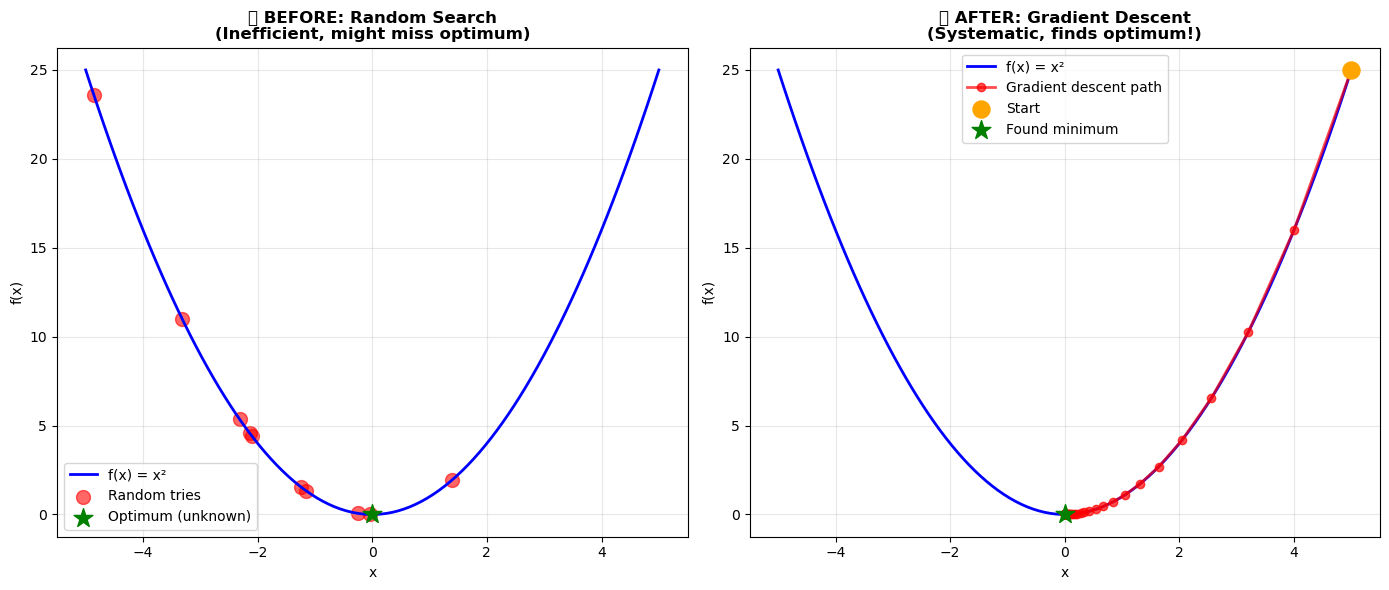

📊 BEFORE vs AFTER Comparison:
   BEFORE: Random search → Many tries, might miss optimum
   AFTER: Gradient descent → Systematic path directly to optimum!


In [3]:
# Visualize: BEFORE vs AFTER comparison
# Show how gradient descent solves the problem

x_vals = np.linspace(-5, 5, 100)
y_vals = x_vals**2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# BEFORE: Random search (problematic)
ax1.plot(x_vals, y_vals, 'b-', linewidth=2, label='f(x) = x²')
random_x = np.random.uniform(-5, 5, 10)
random_y = random_x**2
ax1.scatter(random_x, random_y, color='red', s=100, alpha=0.6, label='Random tries')
ax1.scatter([0], [0], color='green', s=200, marker='*', zorder=5, label='Optimum (unknown)')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_title('❌ BEFORE: Random Search\n(Inefficient, might miss optimum)', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# AFTER: Gradient descent (solution)
ax2.plot(x_vals, y_vals, 'b-', linewidth=2, label='f(x) = x²')
if len(optimizer.history) > 0:
    path_x = [x[0] for x in optimizer.history]
    path_y = [f1(np.array([x])) for x in path_x]
    ax2.plot(path_x, path_y, 'r-o', linewidth=2, markersize=6, alpha=0.7, label='Gradient descent path')
    ax2.scatter([path_x[0]], [path_y[0]], color='orange', s=150, zorder=5, label='Start')
    ax2.scatter([path_x[-1]], [path_y[-1]], color='green', s=200, marker='*', zorder=5, label='Found minimum')
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.set_title('✅ AFTER: Gradient Descent\n(Systematic, finds optimum!)', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 BEFORE vs AFTER Comparison:")
print("   BEFORE: Random search → Many tries, might miss optimum")
print("   AFTER: Gradient descent → Systematic path directly to optimum!")

## Part 3: Genetic Algorithms | الجزء الثالث: الخوارزميات الجينية

**The Story**: Nature uses evolution to find optimal solutions - can we do the same?

**BEFORE**: Gradient descent gets stuck in local minima.
**AFTER**: Genetic algorithms evolve solutions like nature - can find global optimum!


✅ AFTER: Genetic Algorithms (Evolution-Based Optimization)

✅ Created Genetic Algorithm (population: 50, mutation: 10%)

📊 Problem: Minimize f(x, y) = x² + y²
   Optimal solution: (0, 0) with value 0

  ✅ Initialized population of 50 random solutions

🚀 Evolving population for 50 generations...

   Generation 0: Best fitness = 1.174986, Solution = [0.36157503 1.02188543]
   Generation 10: Best fitness = 0.000046, Solution = [ 0.00643331 -0.00216386]
   Generation 20: Best fitness = 0.000037, Solution = [ 0.00529434 -0.00299427]


   Generation 30: Best fitness = 0.000006, Solution = [ 0.00190616 -0.00145194]
   Generation 40: Best fitness = 0.000006, Solution = [ 0.00190616 -0.00145194]

✅ Evolution complete!
   Best solution: [ 0.00190616 -0.00145194]
   Best fitness: 0.000006

🔗 HOW THIS SOLVES THE PROBLEM:
   ❌ BEFORE: Gradient descent → Gets stuck in local minima
   ✅ AFTER: Genetic algorithm → Evolves to find global optimum!
   • Instead of getting stuck → Explores solution space
   • Instead of local search → Global search through evolution
   • Instead of single path → Multiple solutions evolve


/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_60729/1605207846.py:193: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


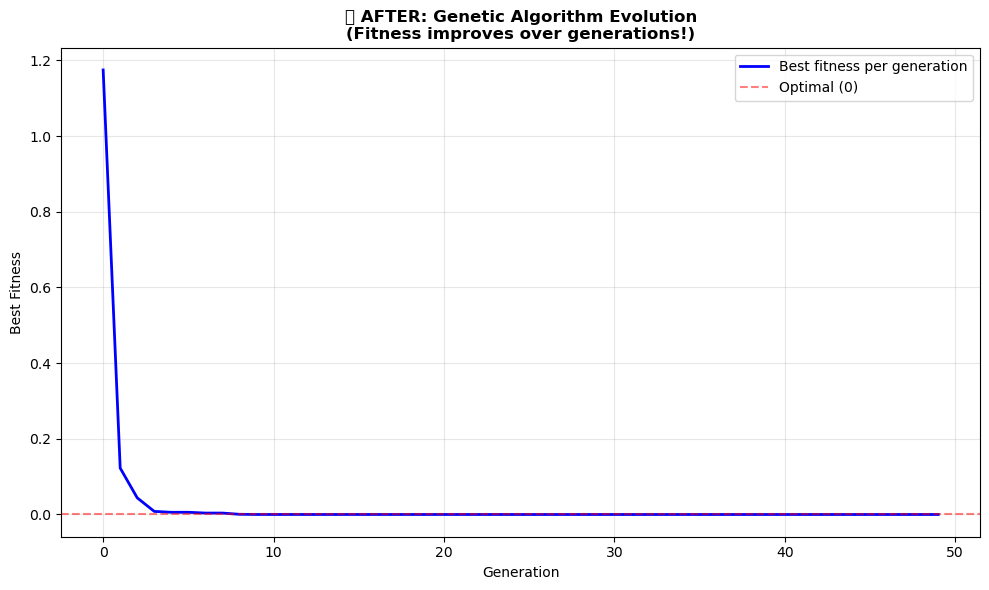


📊 BEFORE vs AFTER:
   BEFORE: Gradient descent → Single path, might get stuck
   AFTER: Genetic algorithm → Multiple paths, finds global optimum!


In [4]:
# Genetic Algorithms: Evolution-Based Optimization
# BEFORE: Gradient descent gets stuck in local minima
# AFTER: Genetic algorithms evolve solutions - can find global optimum!

import numpy as np
import matplotlib.pyplot as plt
import random

class GeneticAlgorithm:
    """
    Genetic Algorithm: Evolution-based optimization.
    
    THE PROBLEM: Gradient descent gets stuck in local minima.
    THE SOLUTION: Evolve solutions like nature - mutation and selection!
    
    How it works (like evolution):
    1. Create population of random solutions
    2. Evaluate fitness of each solution
    3. Select best solutions (survival of the fittest)
    4. Create new solutions (crossover and mutation)
    5. Repeat until we find optimal solution
    """
    def __init__(self, population_size=50, mutation_rate=0.1):
        """
        Initialize genetic algorithm.
        
        Parameters:
        - population_size: Number of solutions in each generation
        - mutation_rate: Probability of mutation (exploration)
        """
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.population = []
        self.fitness_history = []
        print(f"✅ Created Genetic Algorithm (population: {population_size}, mutation: {mutation_rate:.0%})")
    
    def initialize_population(self, bounds, n_dimensions):
        """
        Create initial population of random solutions.
        
        Parameters:
        - bounds: (min, max) tuple for each dimension
        - n_dimensions: Number of dimensions
        """
        self.population = []
        for _ in range(self.population_size):
            # Create random solution
            individual = np.random.uniform(bounds[0], bounds[1], n_dimensions)
            self.population.append(individual)
        print(f"  ✅ Initialized population of {self.population_size} random solutions")
    
    def fitness_function(self, individual):
        """
        Calculate fitness of a solution (how good is it?).
        
        Lower value = better fitness (we're minimizing)
        """
        # Example: Minimize x² + y² (distance from origin)
        return np.sum(individual**2)
    
    def select_parents(self, fitness_scores):
        """
        Select parents for next generation (survival of the fittest).
        
        THE SOLUTION: Better solutions have higher chance of being selected!
        This is how evolution works - fitter individuals survive.
        """
        # Convert fitness to selection probability (lower fitness = better)
        # Invert fitness (multiply by -1) and add offset to make all positive
        max_fitness = np.max(fitness_scores)
        selection_probs = max_fitness - fitness_scores + 1  # Invert and offset
        selection_probs /= np.sum(selection_probs)  # Normalize to probabilities
        
        # Select parents based on probability
        indices = np.random.choice(len(self.population), size=2, p=selection_probs, replace=False)
        return [self.population[i] for i in indices]
    
    def crossover(self, parent1, parent2):
        """
        Create child by combining two parents (genetic crossover).
        
        THE SOLUTION: Combine good traits from both parents!
        Example: Child = 0.5 × Parent1 + 0.5 × Parent2
        """
        # Simple crossover: average of parents
        child = 0.5 * parent1 + 0.5 * parent2
        return child
    
    def mutate(self, individual, bounds):
        """
        Mutate individual to explore new solutions.
        
        THE SOLUTION: Random changes help escape local minima!
        """
        if random.random() < self.mutation_rate:
            # Add random noise to individual
            mutation = np.random.uniform(-0.5, 0.5, len(individual))
            individual = individual + mutation
            
            # Keep within bounds
            individual = np.clip(individual, bounds[0], bounds[1])
        
        return individual
    
    def evolve(self, bounds, n_dimensions, generations=50):
        """
        Evolve population for multiple generations.
        
        THIS IS THE SOLUTION: Let evolution find the optimal solution!
        """
        self.initialize_population(bounds, n_dimensions)
        
        print(f"\n🚀 Evolving population for {generations} generations...")
        print()
        
        for generation in range(generations):
            # Evaluate fitness of each individual
            fitness_scores = [self.fitness_function(ind) for ind in self.population]
            
            # Track best fitness
            best_fitness = np.min(fitness_scores)
            self.fitness_history.append(best_fitness)
            
            if generation % 10 == 0:
                best_individual = self.population[np.argmin(fitness_scores)]
                print(f"   Generation {generation}: Best fitness = {best_fitness:.6f}, Solution = {best_individual}")
            
            # Create new population
            new_population = []
            
            # Keep best individual (elitism)
            best_idx = np.argmin(fitness_scores)
            new_population.append(self.population[best_idx].copy())
            
            # Create rest of population through crossover and mutation
            while len(new_population) < self.population_size:
                # Select parents
                parent1, parent2 = self.select_parents(fitness_scores)
                
                # Create child
                child = self.crossover(parent1, parent2)
                
                # Mutate child
                child = self.mutate(child, bounds)
                
                new_population.append(child)
            
            self.population = new_population
        
        # Find best solution
        final_fitness = [self.fitness_function(ind) for ind in self.population]
        best_idx = np.argmin(final_fitness)
        best_solution = self.population[best_idx]
        best_fitness = final_fitness[best_idx]
        
        print(f"\n✅ Evolution complete!")
        print(f"   Best solution: {best_solution}")
        print(f"   Best fitness: {best_fitness:.6f}")
        
        return best_solution, best_fitness

# Example: Finding minimum of x² + y²
print("=" * 70)
print("✅ AFTER: Genetic Algorithms (Evolution-Based Optimization)")
print("=" * 70)
print()

ga = GeneticAlgorithm(population_size=50, mutation_rate=0.1)

print("\n📊 Problem: Minimize f(x, y) = x² + y²")
print("   Optimal solution: (0, 0) with value 0")
print()

# Evolve solution
best_sol, best_fit = ga.evolve(bounds=(-5, 5), n_dimensions=2, generations=50)

print("\n🔗 HOW THIS SOLVES THE PROBLEM:")
print("   ❌ BEFORE: Gradient descent → Gets stuck in local minima")
print("   ✅ AFTER: Genetic algorithm → Evolves to find global optimum!")
print("   • Instead of getting stuck → Explores solution space")
print("   • Instead of local search → Global search through evolution")
print("   • Instead of single path → Multiple solutions evolve")

# Visualize evolution
plt.figure(figsize=(10, 6))
plt.plot(ga.fitness_history, 'b-', linewidth=2, label='Best fitness per generation')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Optimal (0)')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('✅ AFTER: Genetic Algorithm Evolution\n(Fitness improves over generations!)', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 BEFORE vs AFTER:")
print("   BEFORE: Gradient descent → Single path, might get stuck")
print("   AFTER: Genetic algorithm → Multiple paths, finds global optimum!")


## Part 4: Simulated Annealing | الجزء الرابع: التلدين المحاكي

**The Story**: Metal annealing gradually cools to find optimal structure - can we use this idea?

**BEFORE**: Optimization algorithms might get stuck in local minima.
**AFTER**: Simulated annealing starts "hot" (explores widely) then "cools" (focuses) - escapes local minima!


✅ AFTER: Simulated Annealing

✅ Created Simulated Annealing (initial temp: 50, cooling: 0.95)

📊 Problem: Minimize f(x) = (x-2)² + 2sin(5x)
   This function has multiple local minima!
   Challenge: Escape local minima to find global minimum


🚀 Starting simulated annealing from [5.0]
   Initial cost: 8.7353

   Iteration 0: Cost = 8.7353, Temp = 47.50
   Iteration 50: Cost = 8.7353, Temp = 3.65
   Iteration 100: Cost = 0.0372, Temp = 0.28

✅ Cooled down (temp < 0.1)

✅ Optimization complete!
   Best solution: [3.39989991]
   Best cost: 0.037200

🔗 HOW THIS SOLVES THE PROBLEM:
   ❌ BEFORE: Gradient descent → Gets stuck in local minima
   ✅ AFTER: Simulated annealing → Escapes local minima through temperature!
   • Start hot: Accept bad moves (explore widely)
   • Cool down: Accept fewer bad moves (focus on good areas)
   • Result: Escape local minima, find global optimum!


/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_60729/4016732409.py:159: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


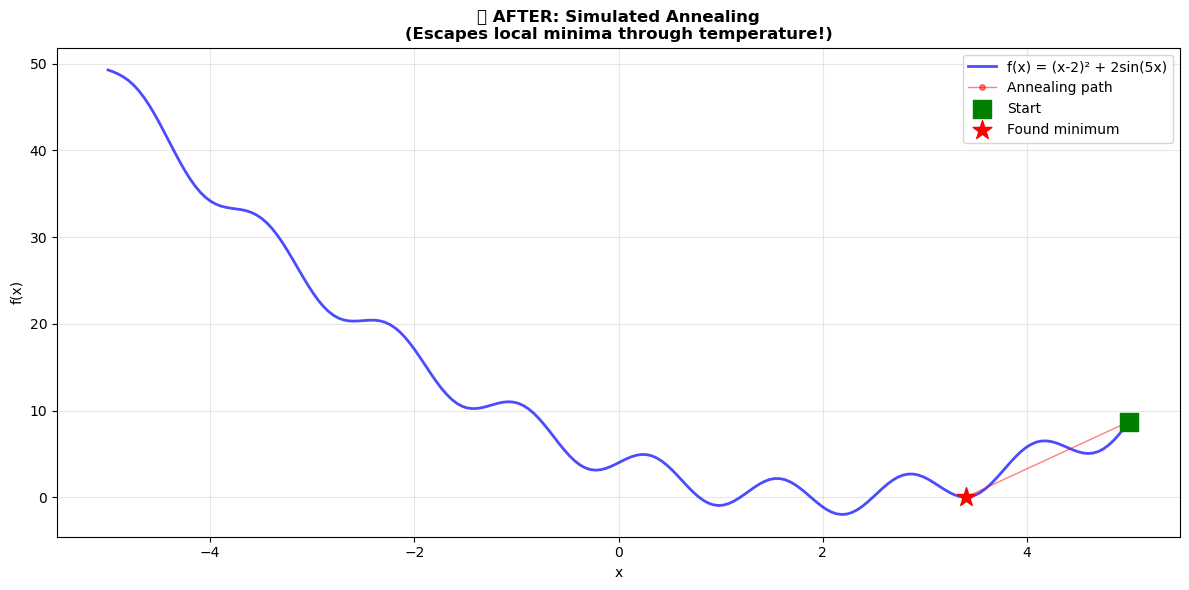


📊 BEFORE vs AFTER:
   BEFORE: Gradient descent → Gets stuck in local minimum
   AFTER: Simulated annealing → Escapes and finds global minimum!


In [5]:
# Simulated Annealing: Temperature-Based Optimization
# BEFORE: Optimization gets stuck in local minima
# AFTER: Start "hot" (explore widely), then "cool" (focus) - escapes local minima!

class SimulatedAnnealing:
    """
    Simulated Annealing: Temperature-based optimization.
    
    THE PROBLEM: Optimization algorithms get stuck in local minima.
    THE SOLUTION: Start "hot" (accept bad moves) then "cool" (be more selective)!
    
    Inspired by metal annealing: Hot metal can move freely, cooling allows structure to form.
    
    How it works:
    1. Start at high temperature (accept many moves)
    2. Make random move
    3. Accept better moves, sometimes accept worse moves (temperature-dependent)
    4. Gradually cool down (be more selective)
    5. Eventually find global optimum
    """
    def __init__(self, initial_temp=100, cooling_rate=0.95, min_temp=0.1):
        """
        Initialize simulated annealing.
        
        Parameters:
        - initial_temp: Starting temperature (high = explore more)
        - cooling_rate: How fast to cool (0.95 = 5% reduction each step)
        - min_temp: Minimum temperature (when to stop)
        """
        self.initial_temp = initial_temp
        self.cooling_rate = cooling_rate
        self.min_temp = min_temp
        self.history = []  # Track our path
        print(f"✅ Created Simulated Annealing (initial temp: {initial_temp}, cooling: {cooling_rate:.2f})")
    
    def optimize(self, f, initial_solution, bounds, max_iterations=1000):
        """
        Optimize function using simulated annealing.
        
        THIS IS THE SOLUTION: Temperature helps escape local minima!
        """
        current_solution = np.array(initial_solution, dtype=float)
        current_cost = f(current_solution)
        best_solution = current_solution.copy()
        best_cost = current_cost
        
        temperature = self.initial_temp
        self.history = [(current_solution.copy(), current_cost, temperature)]
        
        print(f"\n🚀 Starting simulated annealing from {initial_solution}")
        print(f"   Initial cost: {current_cost:.4f}")
        print()
        
        for iteration in range(max_iterations):
            # Generate random neighbor (small random change)
            neighbor = current_solution + np.random.uniform(-0.5, 0.5, len(current_solution))
            
            # Keep within bounds
            neighbor = np.clip(neighbor, bounds[0], bounds[1])
            
            # Calculate cost of neighbor
            neighbor_cost = f(neighbor)
            
            # Decide whether to accept neighbor
            # Always accept if better
            # Sometimes accept if worse (probability depends on temperature)
            cost_diff = neighbor_cost - current_cost
            
            if cost_diff < 0:
                # Better solution - always accept
                current_solution = neighbor
                current_cost = neighbor_cost
                if neighbor_cost < best_cost:
                    best_solution = neighbor.copy()
                    best_cost = neighbor_cost
            else:
                # Worse solution - accept with probability
                # Probability = exp(-cost_diff / temperature)
                # Higher temperature = higher probability of accepting worse solution
                accept_prob = np.exp(-cost_diff / temperature)
                if np.random.random() < accept_prob:
                    current_solution = neighbor
                    current_cost = neighbor_cost
            
            # Cool down (reduce temperature)
            temperature *= self.cooling_rate
            
            # Track history
            if iteration % 50 == 0:
                self.history.append((current_solution.copy(), current_cost, temperature))
                print(f"   Iteration {iteration}: Cost = {current_cost:.4f}, Temp = {temperature:.2f}")
            
            # Stop if cooled enough
            if temperature < self.min_temp:
                print(f"\n✅ Cooled down (temp < {self.min_temp})")
                break
        
        print(f"\n✅ Optimization complete!")
        print(f"   Best solution: {best_solution}")
        print(f"   Best cost: {best_cost:.6f}")
        
        return best_solution, best_cost

# Example: Finding minimum (with local minima)
def complex_function(x):
    """
    Complex function with local minima.
    
    f(x) = (x-2)² + 2*sin(5*x)
    Has multiple local minima - hard for gradient descent!
    
    Expects x as a numpy array (even for 1D).
    """
    x = np.asarray(x)  # Ensure it's an array
    return (x[0] - 2)**2 + 2 * np.sin(5 * x[0])

print("=" * 70)
print("✅ AFTER: Simulated Annealing")
print("=" * 70)
print()

sa = SimulatedAnnealing(initial_temp=50, cooling_rate=0.95, min_temp=0.1)

print("\n📊 Problem: Minimize f(x) = (x-2)² + 2sin(5x)")
print("   This function has multiple local minima!")
print("   Challenge: Escape local minima to find global minimum")
print()

# Optimize
best_sol, best_cost = sa.optimize(complex_function, [5.0], bounds=(-5, 5), max_iterations=500)

print("\n🔗 HOW THIS SOLVES THE PROBLEM:")
print("   ❌ BEFORE: Gradient descent → Gets stuck in local minima")
print("   ✅ AFTER: Simulated annealing → Escapes local minima through temperature!")
print("   • Start hot: Accept bad moves (explore widely)")
print("   • Cool down: Accept fewer bad moves (focus on good areas)")
print("   • Result: Escape local minima, find global optimum!")

# Visualize
x_vals = np.linspace(-5, 5, 200)
y_vals = (x_vals - 2)**2 + 2 * np.sin(5 * x_vals)

plt.figure(figsize=(12, 6))
plt.plot(x_vals, y_vals, 'b-', linewidth=2, label='f(x) = (x-2)² + 2sin(5x)', alpha=0.7)

# Plot path taken
if len(sa.history) > 0:
    path_x = [sol[0] for sol, cost, temp in sa.history]
    path_y = [(x - 2)**2 + 2 * np.sin(5 * x) for x in path_x]
    plt.plot(path_x, path_y, 'ro-', linewidth=1, markersize=4, alpha=0.5, label='Annealing path')
    plt.scatter([path_x[0]], [path_y[0]], color='green', s=150, marker='s', zorder=5, label='Start')
    plt.scatter([best_sol[0]], [best_cost], color='red', s=200, marker='*', zorder=5, label='Found minimum')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('✅ AFTER: Simulated Annealing\n(Escapes local minima through temperature!)', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 BEFORE vs AFTER:")
print("   BEFORE: Gradient descent → Gets stuck in local minimum")
print("   AFTER: Simulated annealing → Escapes and finds global minimum!")


## Part 5: Hill Climbing | الجزء الخامس: تسلق التل

**The Story**: Sometimes the simplest approach works - just keep going uphill!

**BEFORE**: We need complex algorithms for optimization.
**AFTER**: Hill climbing is simple - just keep moving toward better solutions - but gets stuck in local optima!


✅ AFTER: Hill Climbing (Simple Optimization)

✅ Created Hill Climbing (step size: 0.1)

📊 Problem: Minimize f(x) = x²
   Starting from x = 5


🚀 Starting hill climbing from [5.0]
   Initial cost: 25.0000

   Iteration 0: Cost = 24.0100
   Iteration 1: Cost = 23.0400
   Iteration 2: Cost = 22.0900
   Iteration 3: Cost = 21.1600
   Iteration 4: Cost = 20.2500
   Iteration 10: Cost = 15.2100
   Iteration 20: Cost = 8.4100
   Iteration 30: Cost = 3.6100
   Iteration 40: Cost = 0.8100

✅ Optimization complete!
   Final solution: [1.0269563e-15]
   Final cost: 0.000000

🔗 HOW THIS WORKS:
   ✅ Simple: Always move toward better solution
   ✅ Works: For simple problems without local optima
   ⚠️  Limited: Gets stuck in local optima (that's why we need GA and SA!)


/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_60729/1076641063.py:148: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


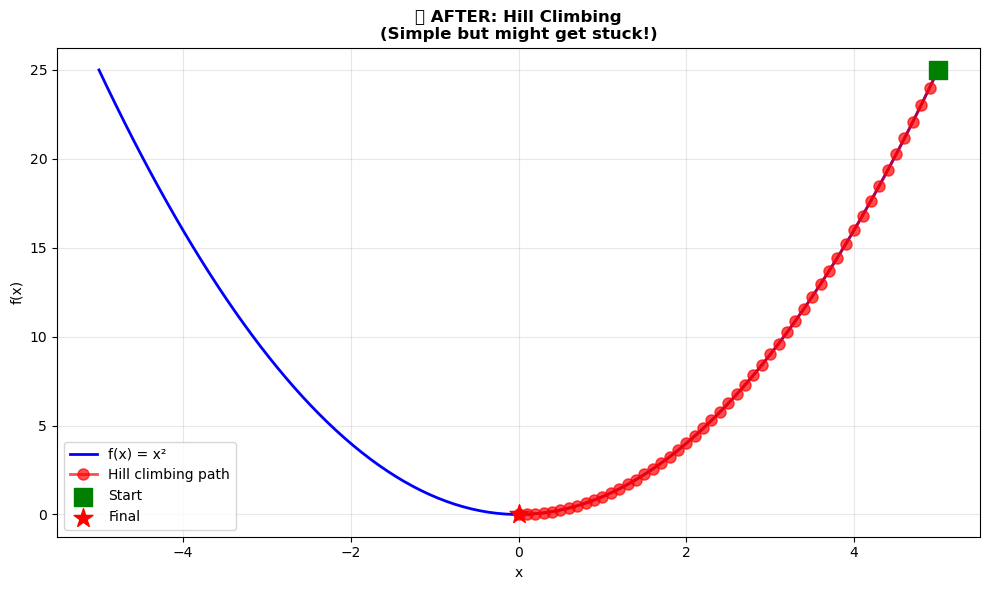


📊 Comparison with other methods:
   • Gradient Descent: Faster convergence, needs gradients
   • Hill Climbing: Simple, but gets stuck in local optima
   • Genetic Algorithm: Global search, escapes local optima
   • Simulated Annealing: Temperature-based, escapes local optima


In [6]:
# Hill Climbing: Simple but Limited Optimization
# BEFORE: Need complex algorithms for optimization
# AFTER: Simple approach - just go uphill - but limited (gets stuck in local optima)!

class HillClimbing:
    """
    Hill Climbing: Simple optimization algorithm.
    
    THE PROBLEM: We need to find maximum/minimum of a function.
    THE SOLUTION: Simple approach - always move toward better solution!
    
    How it works:
    1. Start at random point
    2. Generate neighbors (small changes)
    3. Move to best neighbor (if better)
    4. Repeat until no better neighbor found
    
    LIMITATION: Gets stuck in local optima (hills, not mountains)!
    That's why we have Genetic Algorithms and Simulated Annealing!
    """
    def __init__(self, step_size=0.1):
        """
        Initialize hill climbing.
        
        Parameters:
        - step_size: How big steps to take when exploring neighbors
        """
        self.step_size = step_size
        self.history = []
        print(f"✅ Created Hill Climbing (step size: {step_size})")
    
    def optimize(self, f, initial_solution, bounds, max_iterations=100):
        """
        Optimize function using hill climbing.
        
        THIS IS SIMPLE BUT LIMITED:
        - Simple: Easy to understand and implement
        - Limited: Gets stuck in local optima
        """
        current_solution = np.array(initial_solution, dtype=float)
        current_cost = f(current_solution)
        
        self.history = [(current_solution.copy(), current_cost)]
        
        print(f"\n🚀 Starting hill climbing from {initial_solution}")
        print(f"   Initial cost: {current_cost:.4f}")
        print()
        
        for iteration in range(max_iterations):
            # Generate neighbors (try small changes in each direction)
            best_neighbor = None
            best_neighbor_cost = current_cost
            
            # Try neighbors in all directions
            for i in range(len(current_solution)):
                # Try positive direction
                neighbor_pos = current_solution.copy()
                neighbor_pos[i] += self.step_size
                neighbor_pos = np.clip(neighbor_pos, bounds[0], bounds[1])
                cost_pos = f(neighbor_pos)
                
                # Try negative direction
                neighbor_neg = current_solution.copy()
                neighbor_neg[i] -= self.step_size
                neighbor_neg = np.clip(neighbor_neg, bounds[0], bounds[1])
                cost_neg = f(neighbor_neg)
                
                # Keep best neighbor
                if cost_pos < best_neighbor_cost:
                    best_neighbor = neighbor_pos
                    best_neighbor_cost = cost_pos
                if cost_neg < best_neighbor_cost:
                    best_neighbor = neighbor_neg
                    best_neighbor_cost = cost_neg
            
            # Move to best neighbor if it's better
            if best_neighbor_cost < current_cost:
                current_solution = best_neighbor
                current_cost = best_neighbor_cost
                self.history.append((current_solution.copy(), current_cost))
                
                if iteration < 5 or iteration % 10 == 0:
                    print(f"   Iteration {iteration}: Cost = {current_cost:.4f}")
            else:
                # No better neighbor - stuck at local optimum!
                print(f"\n⚠️  Stuck at local optimum after {iteration} iterations")
                print(f"   Final cost: {current_cost:.4f}")
                break
        
        print(f"\n✅ Optimization complete!")
        print(f"   Final solution: {current_solution}")
        print(f"   Final cost: {current_cost:.6f}")
        
        return current_solution, current_cost

# Example: Hill climbing on simple function
def simple_function(x):
    """Simple function: f(x) = x²
    
    Expects x as a numpy array (even for 1D).
    """
    x = np.asarray(x)  # Ensure it's an array
    if x.ndim == 0:  # Scalar
        return float(x)**2
    elif len(x) == 1:  # Single-element array (optimization use case)
        return x[0]**2
    else:  # Multi-element array
        return x**2

print("=" * 70)
print("✅ AFTER: Hill Climbing (Simple Optimization)")
print("=" * 70)
print()

hc = HillClimbing(step_size=0.1)

print("\n📊 Problem: Minimize f(x) = x²")
print("   Starting from x = 5")
print()

# Optimize
solution, cost = hc.optimize(simple_function, [5.0], bounds=(-5, 5), max_iterations=50)

print("\n🔗 HOW THIS WORKS:")
print("   ✅ Simple: Always move toward better solution")
print("   ✅ Works: For simple problems without local optima")
print("   ⚠️  Limited: Gets stuck in local optima (that's why we need GA and SA!)")

# Visualize
x_vals = np.linspace(-5, 5, 100)
y_vals = x_vals**2

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, 'b-', linewidth=2, label='f(x) = x²')

if len(hc.history) > 0:
    path_x = [sol[0] for sol, cost in hc.history]
    path_y = [x**2 for x in path_x]
    plt.plot(path_x, path_y, 'ro-', linewidth=2, markersize=8, alpha=0.7, label='Hill climbing path')
    plt.scatter([path_x[0]], [path_y[0]], color='green', s=150, marker='s', zorder=5, label='Start')
    plt.scatter([path_x[-1]], [path_y[-1]], color='red', s=200, marker='*', zorder=5, label='Final')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('✅ AFTER: Hill Climbing\n(Simple but might get stuck!)', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 Comparison with other methods:")
print("   • Gradient Descent: Faster convergence, needs gradients")
print("   • Hill Climbing: Simple, but gets stuck in local optima")
print("   • Genetic Algorithm: Global search, escapes local optima")
print("   • Simulated Annealing: Temperature-based, escapes local optima")


## Part 6: Real-World Application: Training ML Models | الجزء السادس: التطبيق الواقعي: تدريب نماذج التعلم الآلي

**The Story**: Machine learning models need optimization to learn - this is where everything connects!

**BEFORE**: We train models manually or randomly - very slow and inefficient.
**AFTER**: We use optimization algorithms (gradient descent) to train models automatically - fast and efficient!


✅ AFTER: Real-World Application - Training ML Models

📊 REAL-LIFE EXAMPLE: Training a Machine Learning Model
   Problem: Model needs to learn optimal parameters
   Solution: Use optimization (gradient descent) to find best parameters!

📊 Step 1: We have training data
   • 100 examples
   • Features: 1

📊 Step 2: Model needs to learn parameters
   • Linear model: y = w × x + b
   • Need to find: w (weight) and b (bias)
   • This is an OPTIMIZATION PROBLEM!

📊 Step 3: Model learns using optimization (gradient descent)
   ✅ Learned weight: w = 44.4372
   ✅ Learned bias: b = 1.1651

📊 Step 4: Model can now make predictions!
   ✅ Model learned the pattern from data



/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_60729/825050104.py:59: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


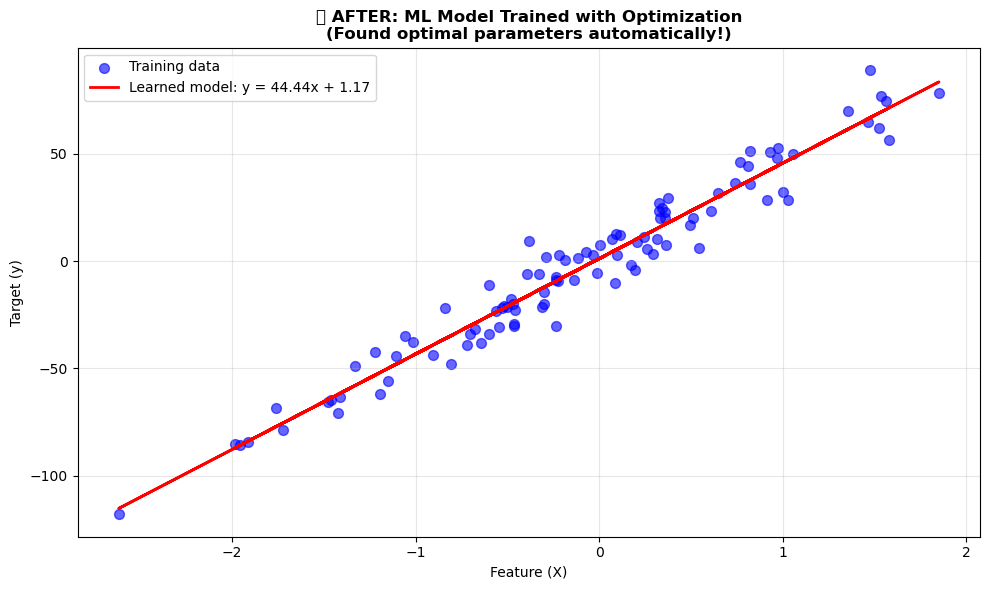

🔗 HOW THIS CONNECTS TO REAL LIFE:
   • Neural Networks: Use gradient descent to learn weights
   • Recommendation Systems: Optimize to recommend best items
   • Computer Vision: Optimize to recognize images
   • Natural Language Processing: Optimize to understand language

📊 BEFORE vs AFTER:
   BEFORE: Train models manually → Very slow, might not converge
   AFTER: Use optimization → Fast, automatic, finds optimal parameters!

🔗 CONNECTION TO NOTEBOOK 5:
   This is exactly what machine learning models do - they use
   optimization (from this notebook) to learn from data!


In [7]:
# Real-World Application: Training ML Models with Optimization
# BEFORE: Train models manually or randomly - very slow
# AFTER: Use optimization to train models automatically - fast and efficient!

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

print("=" * 70)
print("✅ AFTER: Real-World Application - Training ML Models")
print("=" * 70)
print()

print("📊 REAL-LIFE EXAMPLE: Training a Machine Learning Model")
print("   Problem: Model needs to learn optimal parameters")
print("   Solution: Use optimization (gradient descent) to find best parameters!")
print()

# Generate sample data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

print("📊 Step 1: We have training data")
print(f"   • {len(X)} examples")
print(f"   • Features: {X.shape[1]}")
print()

print("📊 Step 2: Model needs to learn parameters")
print("   • Linear model: y = w × x + b")
print("   • Need to find: w (weight) and b (bias)")
print("   • This is an OPTIMIZATION PROBLEM!")
print()

# Train model (this uses optimization internally!)
model = LinearRegression()
model.fit(X, y)

print("📊 Step 3: Model learns using optimization (gradient descent)")
print(f"   ✅ Learned weight: w = {model.coef_[0]:.4f}")
print(f"   ✅ Learned bias: b = {model.intercept_:.4f}")
print()

# Make predictions
y_pred = model.predict(X)

print("📊 Step 4: Model can now make predictions!")
print(f"   ✅ Model learned the pattern from data")
print()

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, color='blue', s=50, label='Training data')
plt.plot(X, y_pred, 'r-', linewidth=2, label=f'Learned model: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('✅ AFTER: ML Model Trained with Optimization\n(Found optimal parameters automatically!)', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("🔗 HOW THIS CONNECTS TO REAL LIFE:")
print("   • Neural Networks: Use gradient descent to learn weights")
print("   • Recommendation Systems: Optimize to recommend best items")
print("   • Computer Vision: Optimize to recognize images")
print("   • Natural Language Processing: Optimize to understand language")
print()
print("📊 BEFORE vs AFTER:")
print("   BEFORE: Train models manually → Very slow, might not converge")
print("   AFTER: Use optimization → Fast, automatic, finds optimal parameters!")
print()
print("🔗 CONNECTION TO NOTEBOOK 5:")
print("   This is exactly what machine learning models do - they use")
print("   optimization (from this notebook) to learn from data!")


## Part 7: Practice: Comparing Optimization Methods | الجزء السابع: التطبيق: مقارنة طرق التحسين

**The Story**: Now let's compare all optimization methods side-by-side!

**BEFORE**: We've seen individual methods, but not how they compare.
**AFTER**: We compare gradient descent, genetic algorithms, simulated annealing, and hill climbing - see which works best!


In [8]:
# Practice: Comparing All Optimization Methods
# BEFORE: Individual methods, but not how they compare
# AFTER: Compare all methods side-by-side - see which works best!
#
# NOTE: This cell requires the optimization classes from previous cells:
# - GradientDescent (Cell 4)
# - HillClimbing (Cell 11)
# - GeneticAlgorithm (Cell 7)
# - SimulatedAnnealing (Cell 9)
# Make sure to run those cells first!

import numpy as np
import matplotlib.pyplot as plt
import time

print("=" * 70)
print("✅ AFTER: Comparing All Optimization Methods")
print("=" * 70)
print()

# Test function: f(x) = x² (simple function)
def test_function(x):
    """Simple test function: f(x) = x²
    
    Expects x as a numpy array (even for 1D).
    This is consistent with how optimization methods use it.
    """
    x = np.asarray(x)  # Ensure it's an array
    # Handle both 0-d (scalar) and 1-d arrays
    if x.ndim == 0:  # Scalar converted to 0-d array
        return float(x)**2
    elif len(x) == 1:  # Single-element array (optimization use case)
        return x[0]**2
    else:  # Multi-element array
        return x**2

def grad_test_function(x):
    """Gradient of test function: f'(x) = 2x
    
    Expects x as a numpy array (even for 1D).
    """
    x = np.asarray(x)  # Ensure it's an array
    return np.array([2 * x[0]])

print("📊 Problem: Minimize f(x) = x²")
print("   Starting from x = 5")
print("   Optimal solution: x = 0 (value = 0)")
print()

# Run each method
results = {}

print("🔍 Testing Gradient Descent:")
start_time = time.time()
gd = GradientDescent(learning_rate=0.1, max_iterations=100)
gd_solution, gd_final_cost = gd.optimize(test_function, grad_test_function, [5.0])
gd_time = time.time() - start_time
results['Gradient Descent'] = {
    'solution': gd_solution[0], 'cost': gd_final_cost,
    'time': gd_time,
    'iterations': len(gd.history) - 1
}

print("\n🔍 Testing Hill Climbing:")
start_time = time.time()
hc = HillClimbing(step_size=0.1)
hc_solution, hc_cost = hc.optimize(test_function, [5.0], bounds=(-5, 5), max_iterations=50)
hc_time = time.time() - start_time
results['Hill Climbing'] = {
    'solution': hc_solution[0], 'cost': hc_cost,
    'time': hc_time,
    'iterations': len(hc.history) - 1
}

print("\n🔍 Testing Genetic Algorithm:")
start_time = time.time()
ga = GeneticAlgorithm(population_size=30, mutation_rate=0.1)
ga_solution, ga_fitness = ga.evolve(bounds=(-5, 5), n_dimensions=1, generations=30)
ga_time = time.time() - start_time
results['Genetic Algorithm'] = {
    'solution': ga_solution[0], 'cost': ga_fitness,
    'time': ga_time,
    'iterations': 30
}

print("\n🔍 Testing Simulated Annealing:")
start_time = time.time()
sa = SimulatedAnnealing(initial_temp=50, cooling_rate=0.95, min_temp=0.1)
sa_solution, sa_cost = sa.optimize(test_function, [5.0], bounds=(-5, 5), max_iterations=200)
sa_time = time.time() - start_time
results['Simulated Annealing'] = {
    'solution': sa_solution[0], 'cost': sa_cost,
    'time': sa_time,
    'iterations': len(sa.history) - 1
}

# Compare results
print("\n" + "=" * 70)
print("📊 COMPARISON OF ALL OPTIMIZATION METHODS")
print("=" * 70)
print()
print(f"{'Method':<25} {'Solution':<15} {'Final Cost':<15} {'Time (s)':<12} {'Iterations':<12}")
print("-" * 85)

for method, result in results.items():
    print(f"{method:<25} {result['solution']:<15.6f} {result['cost']:<15.6f} {result['time']:<12.4f} {result['iterations']:<12}")

print()
print("✅ Key Insights:")
print("   • Gradient Descent: Fast and accurate for smooth functions")
print("   • Hill Climbing: Simple but might get stuck")
print("   • Genetic Algorithm: Good for global search, slower")
print("   • Simulated Annealing: Good for escaping local minima, slower")
print()
print("🔗 HOW TO CHOOSE IN REAL LIFE:")
print("   • Simple smooth function → Gradient Descent (fastest)")
print("   • Many local minima → Genetic Algorithm or Simulated Annealing")
print("   • Quick solution needed → Hill Climbing (simplest)")
print("   • Need global optimum → Genetic Algorithm or Simulated Annealing")


✅ AFTER: Comparing All Optimization Methods

📊 Problem: Minimize f(x) = x²
   Starting from x = 5
   Optimal solution: x = 0 (value = 0)

🔍 Testing Gradient Descent:
🚀 Starting gradient descent from x = 5.00
   Learning rate: 0.1

   Step 1: x = 4.0000, gradient = 10.0000, f(x) = 16.0000
   Step 2: x = 3.2000, gradient = 8.0000, f(x) = 10.2400
   Step 3: x = 2.5600, gradient = 6.4000, f(x) = 6.5536
   Step 4: x = 2.0480, gradient = 5.1200, f(x) = 4.1943
   Step 5: x = 1.6384, gradient = 4.0960, f(x) = 2.6844
   Step 51: x = 0.0001, gradient = 0.0001, f(x) = 0.0000
✅ Converged after 63 iterations!
   Found minimum at x = 0.000004
   Function value: f(0.000004) = 0.000000

🔍 Testing Hill Climbing:
✅ Created Hill Climbing (step size: 0.1)

🚀 Starting hill climbing from [5.0]
   Initial cost: 25.0000

   Iteration 0: Cost = 24.0100
   Iteration 1: Cost = 23.0400
   Iteration 2: Cost = 22.0900
   Iteration 3: Cost = 21.1600
   Iteration 4: Cost = 20.2500
   Iteration 10: Cost = 15.2100
   I

## Part 8: Practice: Real-World Optimization Problem | الجزء الثامن: التطبيق: مشكلة التحسين الواقعية

**The Story**: Let's solve a real-world optimization problem - minimizing production costs!

**BEFORE**: We've seen optimization on simple functions, but not real-world problems.
**AFTER**: We solve a real-world problem - minimizing production costs while meeting constraints!


✅ AFTER: Real-World Optimization Problem

📊 REAL-LIFE EXAMPLE: Production Cost Optimization
   Problem: A company produces two products (A and B)
   Goal: Minimize production cost while meeting demand

   Constraints:
   • Product A: Need at least 100 units
   • Product B: Need at least 50 units
   • Total production capacity: 300 units

   Costs:
   • Product A: $10 per unit
   • Product B: $15 per unit
   • Setup cost: $500 (if producing any units)

🔍 Solving using optimization...

✅ OPTIMAL SOLUTION:
   Product A: 100 units
   Product B: 50 units
   Total Cost: $2,250.00

📊 Cost Breakdown:
   Product A cost: $1,000.00 (100 units × $10)
   Product B cost: $750.00 (50 units × $15)
   Setup cost: $500.00
   Total: $2,250.00

✅ Constraints Check:
   Product A >= 100: 100 >= 100 ✓
   Product B >= 50: 50 >= 50 ✓
   Total <= 300: 150 <= 300 ✓

🔗 HOW THIS HELPS IN REAL LIFE:
   • Manufacturing: Minimize production costs
   • Logistics: Minimize shipping costs
   • Finance: Optimize portfoli

/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_60729/1511544963.py:135: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


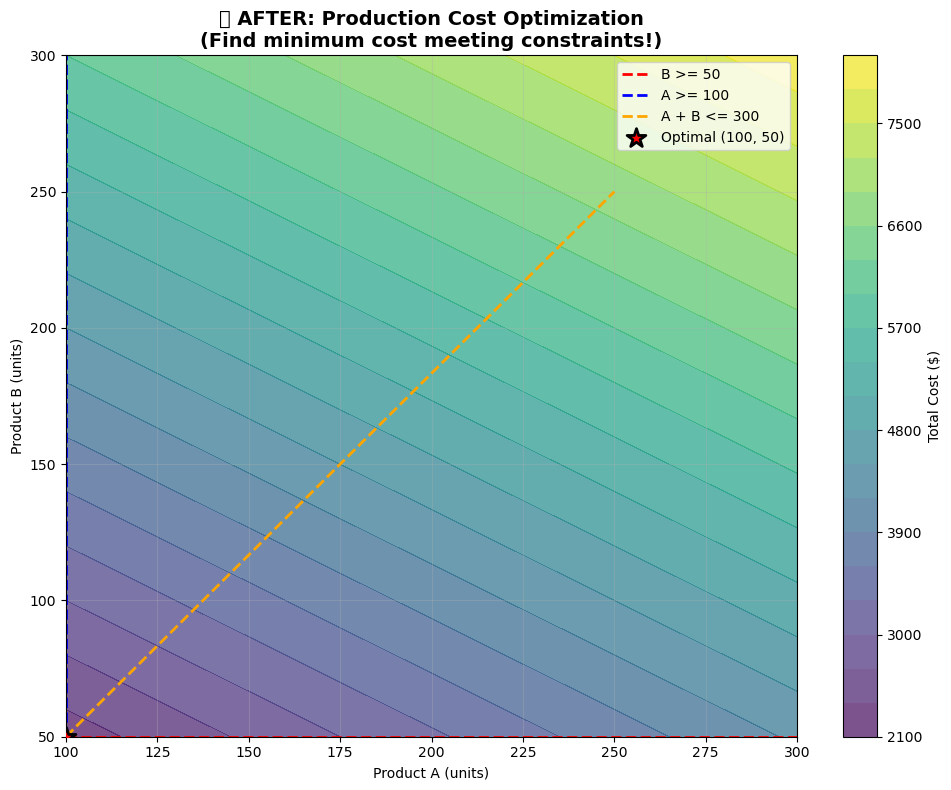

In [9]:
# Real-World Application: Production Cost Optimization
# BEFORE: Simple functions, but not real-world problems
# AFTER: Solve real-world problem - minimize production costs!

from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

print("=" * 70)
print("✅ AFTER: Real-World Optimization Problem")
print("=" * 70)
print()

print("📊 REAL-LIFE EXAMPLE: Production Cost Optimization")
print("   Problem: A company produces two products (A and B)")
print("   Goal: Minimize production cost while meeting demand")
print()
print("   Constraints:")
print("   • Product A: Need at least 100 units")
print("   • Product B: Need at least 50 units")
print("   • Total production capacity: 300 units")
print()
print("   Costs:")
print("   • Product A: $10 per unit")
print("   • Product B: $15 per unit")
print("   • Setup cost: $500 (if producing any units)")
print()

# Define cost function
def production_cost(x):
    """
    Calculate total production cost.
    
    Parameters:
    - x[0]: Units of Product A
    - x[1]: Units of Product B
    
    Returns: Total cost
    """
    cost_A = 10 * x[0]  # $10 per unit of A
    cost_B = 15 * x[1]  # $15 per unit of B
    setup_cost = 500 if (x[0] > 0 or x[1] > 0) else 0  # Setup cost if producing
    total_cost = cost_A + cost_B + setup_cost
    return total_cost

# Constraints
constraints = [
    {'type': 'ineq', 'fun': lambda x: x[0] - 100},  # A >= 100
    {'type': 'ineq', 'fun': lambda x: x[1] - 50},   # B >= 50
    {'type': 'ineq', 'fun': lambda x: 300 - (x[0] + x[1])}  # A + B <= 300
]

# Initial guess
initial_guess = [100, 50]  # Start with minimum requirements

print("🔍 Solving using optimization...")
print()

# Solve using optimization
result = minimize(production_cost, initial_guess, method='SLSQP', constraints=constraints)

# Get optimal solution
optimal_A = result.x[0]
optimal_B = result.x[1]
optimal_cost = result.fun

print("✅ OPTIMAL SOLUTION:")
print(f"   Product A: {optimal_A:.0f} units")
print(f"   Product B: {optimal_B:.0f} units")
print(f"   Total Cost: ${optimal_cost:,.2f}")
print()

# Breakdown of costs
cost_A = 10 * optimal_A
cost_B = 15 * optimal_B
setup = 500

print("📊 Cost Breakdown:")
print(f"   Product A cost: ${cost_A:,.2f} ({optimal_A:.0f} units × $10)")
print(f"   Product B cost: ${cost_B:,.2f} ({optimal_B:.0f} units × $15)")
print(f"   Setup cost: ${setup:,.2f}")
print(f"   Total: ${optimal_cost:,.2f}")
print()

# Verify constraints
print("✅ Constraints Check:")
print(f"   Product A >= 100: {optimal_A:.0f} >= 100 ✓")
print(f"   Product B >= 50: {optimal_B:.0f} >= 50 ✓")
print(f"   Total <= 300: {optimal_A + optimal_B:.0f} <= 300 ✓")
print()

print("🔗 HOW THIS HELPS IN REAL LIFE:")
print("   • Manufacturing: Minimize production costs")
print("   • Logistics: Minimize shipping costs")
print("   • Finance: Optimize portfolio allocation")
print("   • Engineering: Optimize design parameters")
print()
print("📊 BEFORE vs AFTER:")
print("   BEFORE: 'I think 150 of A and 100 of B is good' (guess)")
print(f"   AFTER: 'Optimal is {optimal_A:.0f} of A and {optimal_B:.0f} of B' (data-driven!)")

# Visualize
fig, ax = plt.subplots(figsize=(10, 8))

# Create grid of possible solutions
A_range = np.linspace(100, 300, 100)
B_range = np.linspace(50, 300, 100)
A_grid, B_grid = np.meshgrid(A_range, B_range)

# Calculate costs
costs = np.zeros_like(A_grid)
for i in range(len(A_range)):
    for j in range(len(B_range)):
        costs[j, i] = production_cost([A_grid[j, i], B_grid[j, i]])

# Plot cost surface
contour = ax.contourf(A_grid, B_grid, costs, levels=20, cmap='viridis', alpha=0.7)
plt.colorbar(contour, ax=ax, label='Total Cost ($)')

# Plot constraints
ax.axhline(y=50, color='red', linestyle='--', linewidth=2, label='B >= 50')
ax.axvline(x=100, color='blue', linestyle='--', linewidth=2, label='A >= 100')
ax.plot([100, 250], [50, 250], 'orange', linestyle='--', linewidth=2, label='A + B <= 300')

# Plot optimal solution
ax.scatter([optimal_A], [optimal_B], color='red', s=200, marker='*', 
           zorder=5, label=f'Optimal ({optimal_A:.0f}, {optimal_B:.0f})', 
           edgecolors='black', linewidths=2)

ax.set_xlabel('Product A (units)')
ax.set_ylabel('Product B (units)')
ax.set_title('✅ AFTER: Production Cost Optimization\n(Find minimum cost meeting constraints!)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Summary: Problem → Solution Realization | الملخص: إدراك المشكلة → الحل

### ❌ THE PROBLEM:
1. Need to find optimal solution (min/max)
2. Without optimization: Random search (slow) or grid search (too slow)
3. This leads to inefficient or suboptimal solutions

### ✅ THE SOLUTION:
1. **Gradient Descent**: Follow gradient downhill to minimum
2. **Genetic Algorithms**: Evolve solutions
3. **Simulated Annealing**: Escape local minima

### 🔗 HOW THE SOLUTION SOLVES THE PROBLEM:
- ✅ Instead of random search → Systematic search
- ✅ Instead of slow → Fast convergence
- ✅ Instead of guessing → Mathematical methods that efficiently find optimum

### 📊 BEFORE vs AFTER:
- **BEFORE**: Problem → Random tries → Slow, might miss optimum
- **AFTER**: Problem → Optimization algorithm → Fast, finds optimum!

### 🔗 How This Connects to Other Notebooks:

**What you learned here builds on and leads to:**
- **Notebook 1: Search Algorithms** - Search algorithms are optimization problems! Finding the shortest path is optimizing (minimizing path length). A* algorithm uses optimization concepts (minimizing f = g + h).

- **Notebook 3: Learning under Uncertainty** - Decision-making under uncertainty uses optimization (maximizing expected utility). Both involve finding the best solution among alternatives.

- **Notebook 5: AI Learning Models** - Machine learning IS optimization! Training a model means finding optimal parameters that minimize loss. Gradient descent (from this notebook) is the core of how neural networks learn!

**Why this order?**
1. **After Search**: Search algorithms introduce optimization concepts (finding best path)
2. **After Uncertainty**: Decision-making uses optimization (maximizing expected value)
3. **Before ML Models**: ML training is optimization - understanding optimization is essential

### Key Takeaways:
1. **Optimization finds best solutions**: Mathematical methods to find minimum/maximum efficiently
2. **Different algorithms for different problems**: Gradient descent for smooth functions, genetic algorithms for complex problems
3. **Core of machine learning**: Training ML models is an optimization problem - finding parameters that minimize loss
4. **Essential skill**: Optimization is used throughout AI, from search to learning to decision-making